<IPython.core.display.Javascript object>


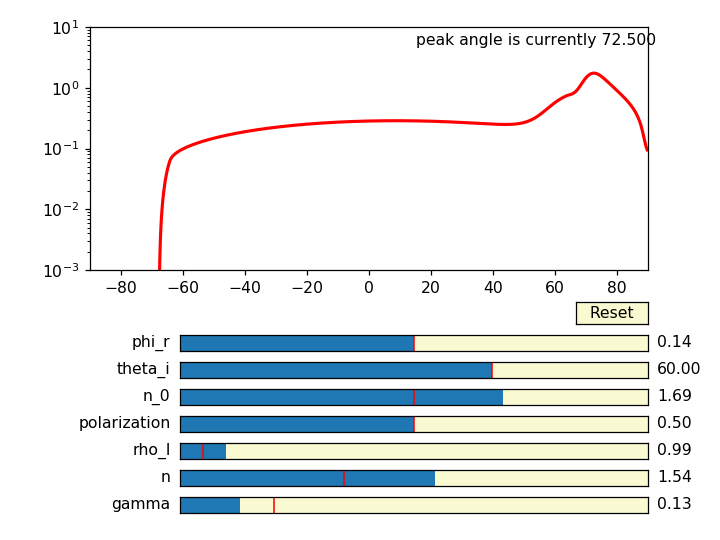

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from TSTR_fit_new import BRIDF_plotter
from matplotlib.widgets import Slider, Button

#plt.ion()
%matplotlib notebook

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.5, top=0.95)

theta_r = np.arange(-90, 90, 0.25)
phi_r_0 = 0
theta_i_0 = 60 #45
n_0_0 = 1.5 #1
polarization_0 = 0.5
rho_l_0 = 0.5
n__0 = 1.35 #1.5
gamma_0 = 0.2 #0.05

average_angle=4.
precision=0.25#-1
sigma_theta_i=2.

s = BRIDF_plotter(theta_r, phi_r_0, theta_i_0, n_0_0, polarization_0, [rho_l_0, n__0, gamma_0], \
                  average_angle=average_angle, precision=precision, sigma_theta_i=sigma_theta_i)
l, = plt.semilogy(theta_r, s, lw=2, color='red')
plt.axis([-90., 90., 1.e-3, 10])

t1 = plt.text(15, 5, "peak angle is currently 45.0")

axcolor = 'lightgoldenrodyellow'

axphi_r = plt.axes([0.25, 0.35, 0.65, 0.03], facecolor=axcolor)
axtheta_i = plt.axes([0.25, 0.3, 0.65, 0.03], facecolor=axcolor)
axn_0 = plt.axes([0.25, 0.25, 0.65, 0.03], facecolor=axcolor)
axpolarization = plt.axes([0.25, 0.2, 0.65, 0.03], facecolor=axcolor)
axrho_l = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
axn = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axgamma = plt.axes([0.25, 0.05, 0.65, 0.03], facecolor=axcolor)

sphi_r = Slider(axphi_r, "phi_r", -90., 90., valinit=phi_r_0)
stheta_i = Slider(axtheta_i, "theta_i", 0., 90., valinit=theta_i_0)
sn_0 = Slider(axn_0, "n_0", 1., 2., valinit=n_0_0)
spolarization = Slider(axpolarization, "polarization", 0., 1., valinit=polarization_0)
srho_l = Slider(axrho_l, "rho_l", 0., 2., valinit=rho_l_0)
sn = Slider(axn, "n", 1., 2., valinit=n__0)
sgamma = Slider(axgamma, "gamma", 0., 1., valinit=gamma_0)

def update(val):
    phi_r = sphi_r.val
    theta_i = stheta_i.val
    n_0 = sn_0.val
    polarization = spolarization.val
    rho_l = srho_l.val
    n = sn.val
    gamma = sgamma.val
    y_data = BRIDF_plotter(theta_r, phi_r, theta_i, n_0, polarization, [rho_l, n, gamma],\
                           average_angle=average_angle, precision=precision, sigma_theta_i=sigma_theta_i)
    # smear data (for wider PD)
    # half_smear_length = 18
    # smear_length = half_smear_length*2
    # y_data = y_data_unsmeared[:]
    # y_data_unsmeared = [0.]*half_smear_length + y_data_unsmeared + [0.]*half_smear_length # zero pad start and end
    
    # for ii in range(len(y_data)):
       # y_data[ii] = np.mean(y_data_unsmeared[(ii):(ii+smear_length)])
    l.set_ydata(y_data)
    t1.set_text("peak angle is currently {0:.3f}".format(theta_r[y_data.index(max(y_data))]) )
    fig.canvas.draw_idle()

sphi_r.on_changed(update)
stheta_i.on_changed(update)
sn_0.on_changed(update)
spolarization.on_changed(update)
srho_l.on_changed(update)
sn.on_changed(update)
sgamma.on_changed(update)

resetax = plt.axes([0.8, 0.4, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sphi_r.reset()
    stheta_i.reset()
    sn_0.reset()
    spolarization.reset()
    srho_l.reset()
    sn.reset()
    sgamma.reset()

button.on_clicked(reset)

plt.show()

Markdown text here... $\alpha$

In [9]:
%%bash
ls -a

.
..
FresnelPlots.ipynb
.ipynb_checkpoints
PTFE_Model_Silva_2009.nb
PTFE-Reflectance-ThesisCoimbra.pdf
slider.ipynb
slider.py
Torrance-Sparrow Off-Specular Peak Data.pdf
TSTR_fit.py
TSTR_fit.pyc
